   CustomerID  Age  Gender  Income  MonthlySpend  UsageFrequency  \
0           1   25       1   50000           200               5   
1           2   45       0   80000           350               8   
2           3   32       1   62000           150               4   
3           4   58       0   95000           400              10   
4           5   33       1   47000           180               3   

   ActivityScore  Churn  
0             80      0  
1             90      1  
2             60      0  
3             95      0  
4             70      1  


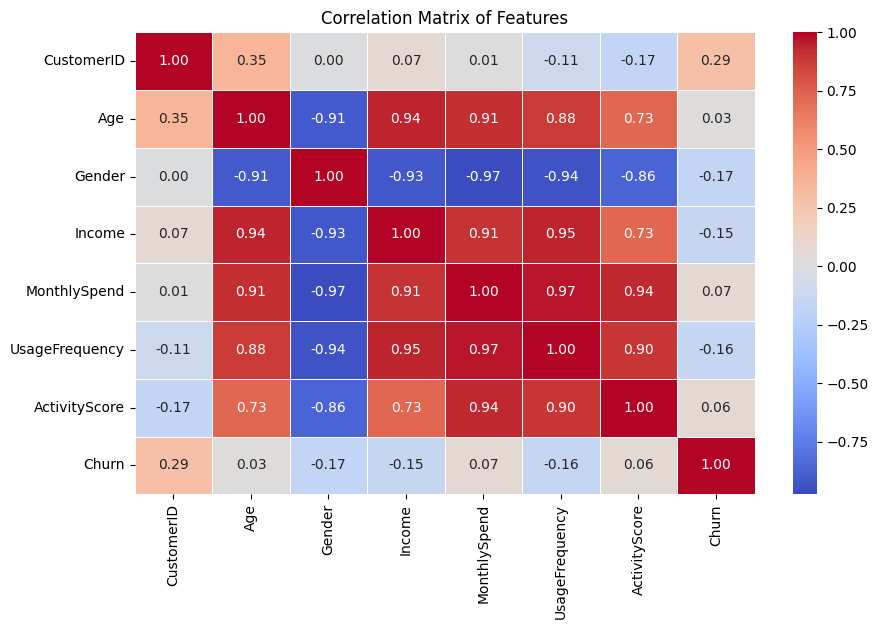

Model Accuracy: 0.00
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Top predictors of customer churn:
UsageFrequency    0.318841
Income            0.198068
ActivityScore     0.154589
MonthlySpend      0.149758
Age               0.149758
Gender            0.028986
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [25, 45, 32, 58, 33],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Income': [50000, 80000, 62000, 95000, 47000],
    'MonthlySpend': [200, 350, 150, 400, 180],
    'UsageFrequency': [5, 8, 4, 10, 3],
    'ActivityScore': [80, 90, 60, 95, 70],
    'Churn': [0, 1, 0, 0, 1]  # 1 = churned, 0 = not churned
}
df = pd.DataFrame(data)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 0, Female = 1
print(df)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()
X = df.drop(columns=['CustomerID', 'Churn'])  
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top predictors of customer churn:")
print(feature_importances)